In [1]:
import sys  
sys.path.insert(0, '/Users/vaclav/ownCloud/diploma_thesis/project/AdaLAM/adalam')
sys.path.insert(0, '/Users/vaclav/ownCloud/diploma_thesis/project/AdaLAM/examples')

from example import *

import matplotlib.pyplot as plt
%matplotlib widget


im1="AdaLAM/examples/im1.jpg"
im2="AdaLAM/examples/im2.jpg"

k1, o1, s1, d1, im1 = extract_keypoints(im1)
k2, o2, s2, d2, im2 = extract_keypoints(im2)

matcher = AdalamFilter()
matches = matcher.match_and_filter(k1=k1, k2=k2,
                                   o1=o1, o2=o2,
                                   d1=d1, d2=d2,
                                   s1=s1, s2=s2,
                                   im1shape=im1.shape[:2], im2shape=im2.shape[:2]).cpu().numpy()

vis = get_matches(im1, im2, k1=k1[matches[:, 0]], k2=k2[matches[:, 1]])

plt.figure()
plt.imshow(vis)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

is torch.cuda.is_available(): False
Pipeline config:
	chosen_depth_files	None
	estimate_k	False
	feature_descriptor	<SIFT 0x7fb092841930>
	file_name_suffix	.jpg
	focal_point_mean_factor	0.5
	knn_ratio_threshold	0.85
	matching_difficulties	[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
	matching_limit	1000
	matching_pairs	None
	output_dir	work/pipeline_notebooks
	output_dir_prefix	None
	planes_based_matching	True
	rectify	True
	save_clustered_components	False
	save_clusters	False
	save_matching	False
	save_rectification	False
	save_sky_mask	False
	scene_name	scene1
	scene_type	orig
	sequential_files_limit	None
	show_clustered_components	True
	show_clusters	True
	show_input_img	True
	show_matching	True
	show_orig_image	True
	show_rectification	False
	show_save_normals	False
	show_sky_mask	False
	use_cached_img_data	False
	use_degensac	True

Config:
	do_flann	False
	key_planes_based_matching_merge_components	True
	rectification_interpolation_key	1
	config_map	{'do_flann': False, 'key_planes_based_matchin

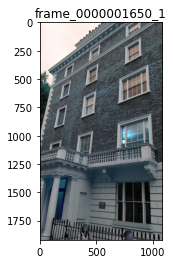

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


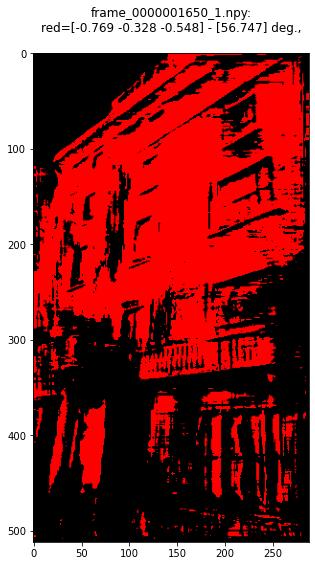

/Users/vaclav/miniconda3/envs/SVP/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


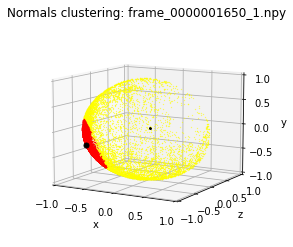

Will upsample the normals


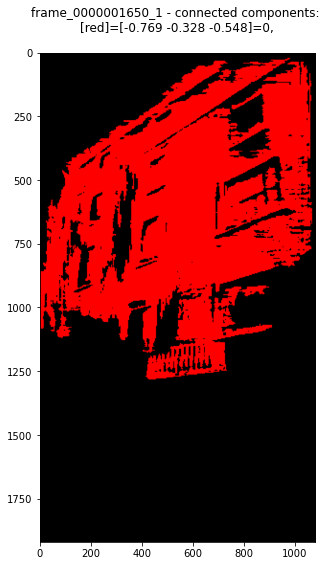

img data for frame_0000001650_1 saving into: work/pipeline_notebooks/imgs/frame_0000001650_1_img_data.pkl
Processing: frame_0000000730_3


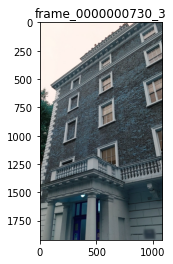

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


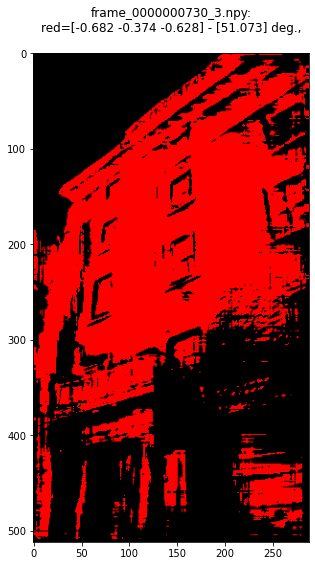

/Users/vaclav/miniconda3/envs/SVP/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


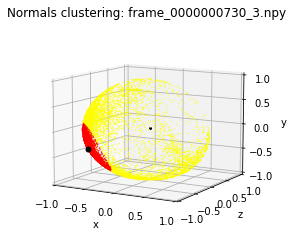

Will upsample the normals


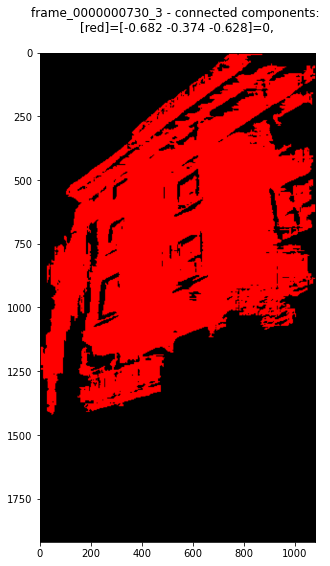

img data for frame_0000000730_3 saving into: work/pipeline_notebooks/imgs/frame_0000000730_3_img_data.pkl


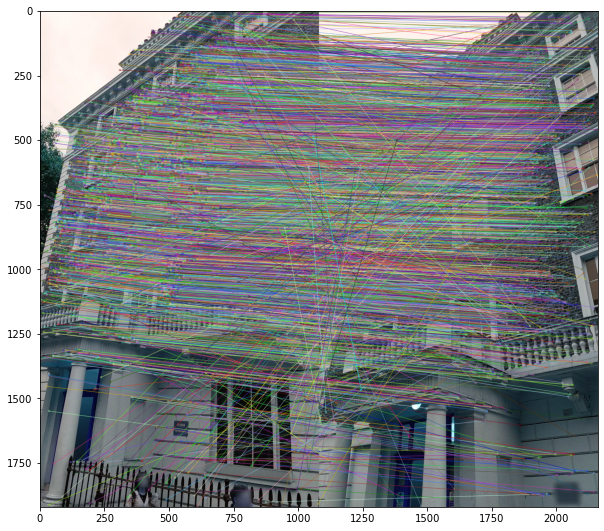

In [7]:
%matplotlib inline
from pipeline import *
from matching import find_correspondences, find_correspondences

Timer.start()

pipeline = Pipeline.configure("notebook_configs/adalam_config.txt", None)
pipeline.start()

#frame_0000001650_1_frame_0000000730_3

# img1 = "frame_0000000535_3"
# img2 = "frame_0000000450_3"
img1 = "frame_0000001650_1"
img2 = "frame_0000000730_3"

id1 = pipeline.process_image(img1)
id2 = pipeline.process_image(img2)


def get_pts_o_sc(tm, kp1, kp2):
    pts1 = np.array([kp1[m.queryIdx].pt for m in tm], dtype=np.float32)
    ors1 = np.array([kp1[m.queryIdx].angle for m in tm], dtype=np.float32)
    scs1 = np.array([kp1[m.queryIdx].size for m in tm], dtype=np.float32)

    pts2 = np.array([kp2[m.trainIdx].pt for m in tm], dtype=np.float32)
    ors2 = np.array([kp2[m.trainIdx].angle for m in tm], dtype=np.float32)
    scs2 = np.array([kp2[m.trainIdx].size for m in tm], dtype=np.float32)

#     ors1 = np.array([k.angle for k in kp1], dtype=np.float32)
#     scs1 = np.array([k.size for k in kp1], dtype=np.float32)
    
    return pts1, ors1, scs1, pts2, ors2, scs2


def split_points(tentative_matches, kps1, kps2):
    src_pts = np.float32([kps1[m.queryIdx].pt for m in tentative_matches]).reshape(-1, 2)
    dst_pts = np.float32([kps2[m.trainIdx].pt for m in tentative_matches]).reshape(-1, 2)
    return src_pts, dst_pts


# pts1, ors1, scs1 = get_pts_o_sc(id1.key_points)
# pts2, ors2, scs2 = get_pts_o_sc(id2.key_points)

    
tm = find_correspondences(id1.img, id1.key_points, id1.descriptions, 
                                         id2.img, id2.key_points, id2.descriptions, 
                                         ratio_thresh=0.85, 
                                         show=True, 
                                         save=False)
    


In [14]:
def orientation_diff(o1, o2):
    diff = o2 - o1
    diff[diff < - 180] += 360
    diff[diff >= 180] -= 360
    return diff


pts1, ors1, scs1, pts2, ors2, scs2 = get_pts_o_sc(tm, id1.key_points, id2.key_points)

scs_r = scs1/scs2
o_diff = orientation_diff(ors1, ors2)

hist_s = np.histogram(scs_r, bins=20)
hist_o = np.histogram(np.abs(o_diff), bins=20)

print("hist s: {}".format(hist_s))
print("hist o: {}".format(hist_o))
    
# class ImageData:
#     img: np.ndarray
#     key_points: List[cv.KeyPoint]
#     descriptions: object
#     real_K: np.ndarray
#     normals: np.ndarray
#     components_indices: np.ndarray
#     valid_components_dict: dict


Timer.end()


hist s: (array([ 101, 3720,  423,   27,   12,    4,    4,    4,    1,    0,    1,
          0,    0,    0,    0,    1,    0,    0,    0,    1]), array([0.026, 0.509, 0.992, 1.474, 1.957, 2.44 , 2.923, 3.406, 3.888,
       4.371, 4.854, 5.337, 5.819, 6.302, 6.785, 7.268, 7.751, 8.233,
       8.716, 9.199, 9.682], dtype=float32))
hist o: (array([1777, 2037,  260,   27,   10,    4,    2,   13,   12,   15,   17,
         10,    4,    6,    2,    3,   12,   17,   32,   39]), array([  0.002,   9.001,  17.999,  26.998,  35.997,  44.996,  53.994,
        62.993,  71.992,  80.991,  89.989,  98.988, 107.987, 116.985,
       125.984, 134.983, 143.982, 152.98 , 161.979, 170.978, 179.977],
      dtype=float32))
Done. Time elapsed from start: 626.5592., 
Statistics: 
reading scene info called 3 times and it took 1.2065 secs. on average
sky masking called 4 times and it took 1.6246 secs. on average
clustering for N=300 called 4 times and it took 4.0674 secs. on average
clustering normals called 4 tim